In [1]:
!pip install tensorflow numpy

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

In [3]:
# Define the text corpus
text = "hello world how are you doing today this is a simple rnn example for google colab"

# Create character to index mapping
chars = sorted(list(set(text)))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

# Parameters
seq_length = 10
vocab_size = len(chars)

In [4]:
# Create input sequences and corresponding targets
input_seqs = []
target_chars = []

for i in range(0, len(text) - seq_length):
    input_seq = text[i:i + seq_length]
    target_char = text[i + seq_length]
    input_seqs.append([char_to_idx[char] for char in input_seq])
    target_chars.append(char_to_idx[target_char])

# Convert to numpy arrays and one-hot encode
X = np.array(input_seqs)
y = to_categorical(target_chars, num_classes=vocab_size)

# Reshape X to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], seq_length, 1))

# Normalize
X = X / float(vocab_size)

In [5]:
model = Sequential([
    SimpleRNN(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 22)             │         2,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,478 (76.09 KB)

 Trainable params: 19,478 (76.09 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8600 - loss: 0.7581
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8249 - loss: 0.7486
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8335 - loss: 0.7944
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8405 - loss: 0.7180
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8624 - loss: 0.7119
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8921 - loss: 0.6981
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8937 - loss: 0.6575
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8999 - loss: 0.6554
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9124 - loss: 0.6089
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9038 - loss: 0.6228
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9265 - loss: 0.5994 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9116 - loss: 0.5960 

In [9]:
def generate_text(seed, length):
    generated = seed
    for _ in range(length):
        x = np.array([char_to_idx[c] for c in seed[-seq_length:]])
        x = np.reshape(x, (1, seq_length, 1))
        x = x / float(vocab_size)

        pred = model.predict(x, verbose=0)
        next_idx = np.argmax(pred)
        next_char = idx_to_char[next_idx]

        generated += next_char
        seed = seed[1:] + next_char
    return generated

# Test the model with a seed
seed = "hello world"
generated_text = generate_text(seed, 20)
print("Seed:", seed)
print("Generated:", generated_text)

Seed: hello world
Generated: hello world how aoo you doim  t


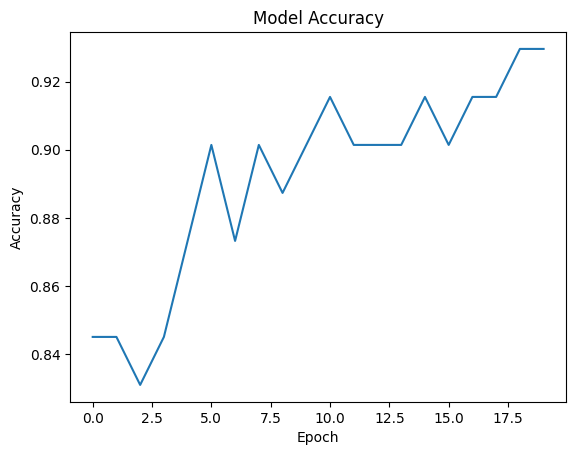

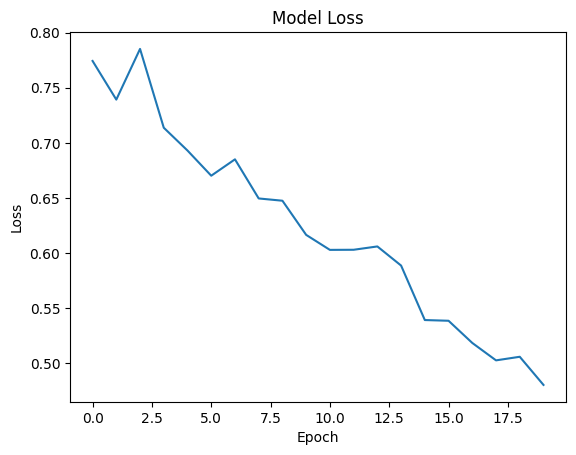

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()